# Data Analysis and Visualization Notebook

This notebook performs basic data analysis and visualization tasks on the Amazon top 500 dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

sns.set_theme(style="whitegrid")
# Download NLTK stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aboueleyes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the dataset
df = pd.read_csv("../data/amazon_top500.csv")

## Data Exploration

In [3]:
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN


In [4]:
# Check for missing values
df.isnull().sum()

title               0
brand               0
description       245
price/currency     30
price/value        30
stars             241
reviewsCount      241
dtype: int64

In [5]:
# Drop unnecessary columns
df.drop(['stars', 'reviewsCount', 'price/currency'], axis=1, inplace=True)

In [6]:
# Remove rows with missing values
df.dropna(inplace=True)

## Data Preprocessing

In [7]:
# Check data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 2 to 496
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        240 non-null    object 
 1   brand        240 non-null    object 
 2   description  240 non-null    object 
 3   price/value  240 non-null    float64
dtypes: float64(1), object(3)
memory usage: 9.4+ KB


## Summary Statistics

In [8]:
df.describe()

,price/value
count,240.00000
mean,36.86125
std,55.66558
min,2.99000
25%,7.98250
50%,20.82000
75%,43.99250
max,575.00000


## Data Visualization

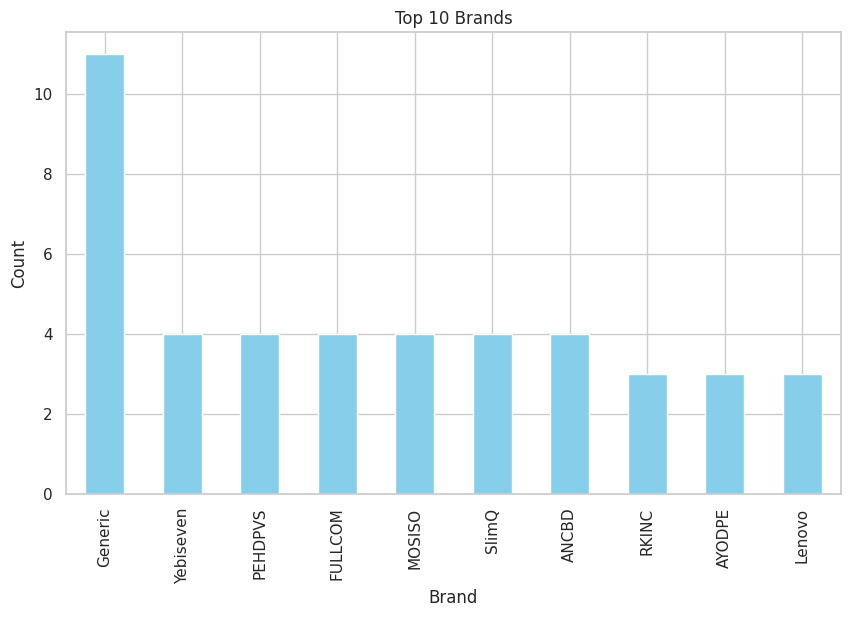

In [9]:
# Distribution of top 10 brands
plt.figure(figsize=(10, 6))
df['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

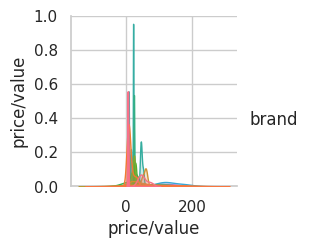

In [10]:
# Pairplot to visualize relationships between numerical variables, colored by brand
sns.pairplot(df, hue='brand')
plt.show()

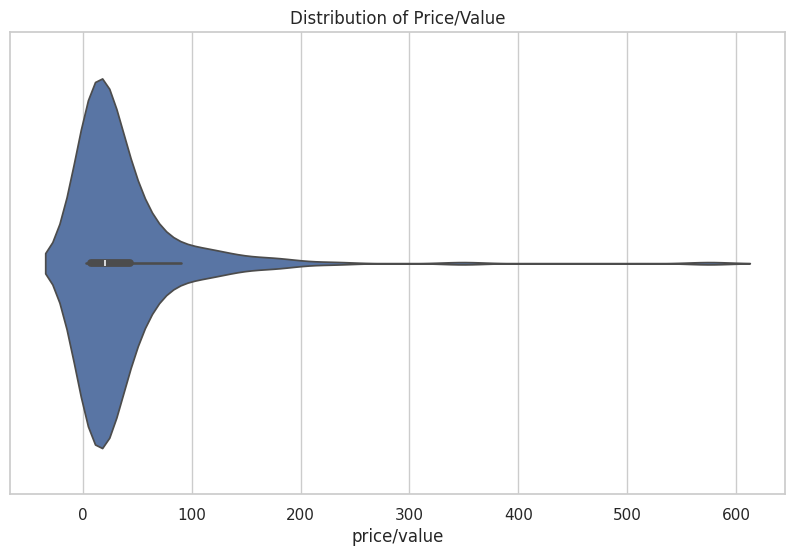

In [11]:
# Violin plot to visualize the distribution of price/value
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="price/value")
plt.title('Distribution of Price/Value')
plt.show()

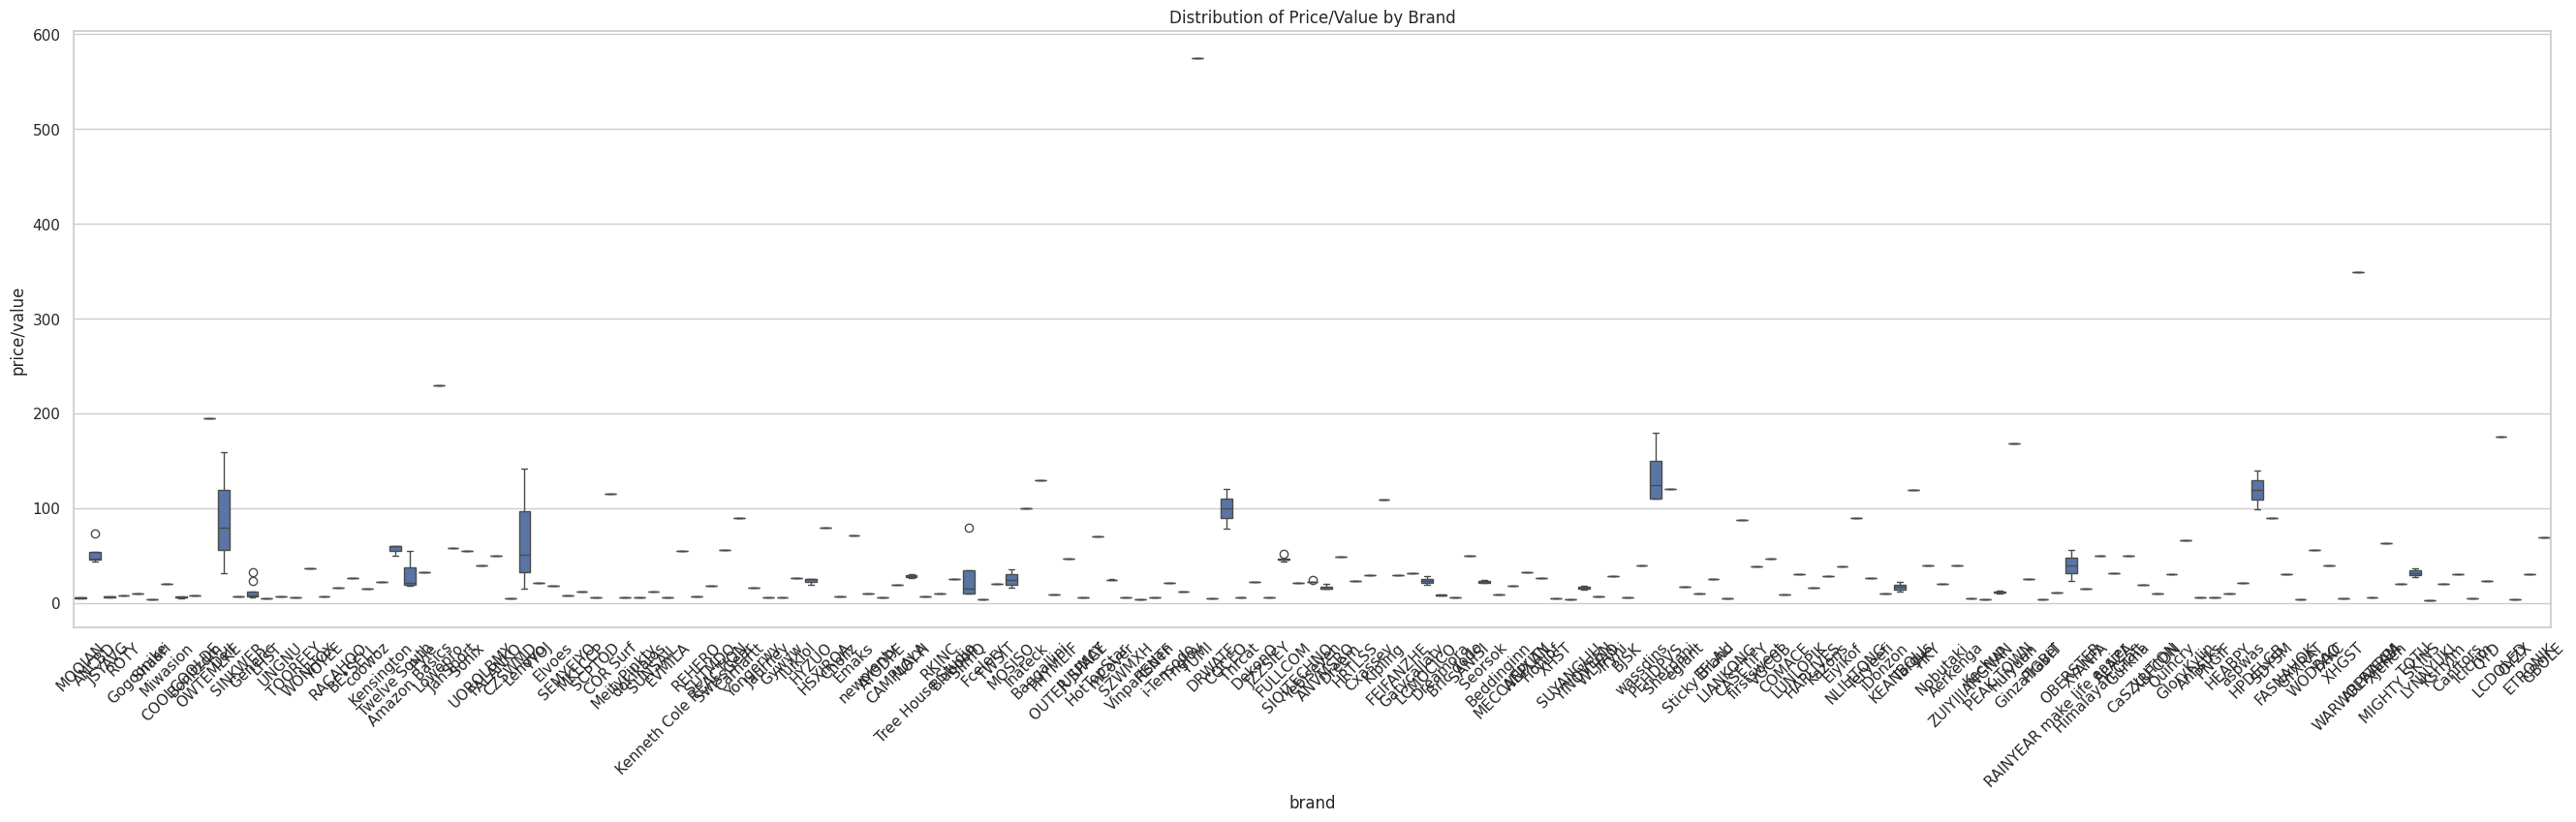

In [12]:
# Box plot to visualize the distribution of price/value, with respect to brand
plt.figure(figsize=(33, 8))
sns.boxplot(data=df, x='brand', y='price/value')
plt.title('Distribution of Price/Value by Brand')
plt.xticks(rotation=45)
plt.show()

In [13]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
    
    return filtered_tokens

In [14]:
df['description_processed'] = df['description'].apply(preprocess_text)


In [15]:
df['title_processed'] = df['title'].apply(preprocess_text)


In [16]:
def get_most_common_words(tokens, n=10):
    word_freq = Counter(tokens)
    most_common_words = word_freq.most_common(n)
    return most_common_words

In [17]:
description_tokens = [token for sublist in df['description_processed'] for token in sublist]
most_common_description_words = get_most_common_words(description_tokens)
print('Most common words in description:', most_common_description_words)

Most common words in description: [('laptop', 252), ('stickers', 235), ('leopard', 158), ('compatible', 128), ('x', 115), ('pro', 112), ('use', 111), ('sticker', 107), ('inch', 107), ('please', 103)]


In [18]:
title_tokens = [token for sublist in df['title_processed'] for token in sublist]
most_common_title_words = get_most_common_words(title_tokens)
print('Most common words in title:', most_common_title_words)


Most common words in title: [('laptop', 189), ('stickers', 171), ('backpack', 74), ('water', 73), ('case', 63), ('waterproof', 60), ('inch', 59), ('vinyl', 57), ('macbook', 46), ('compatible', 45)]


In [20]:
def plot_most_common_words(most_common_words, title):
    words, frequencies = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

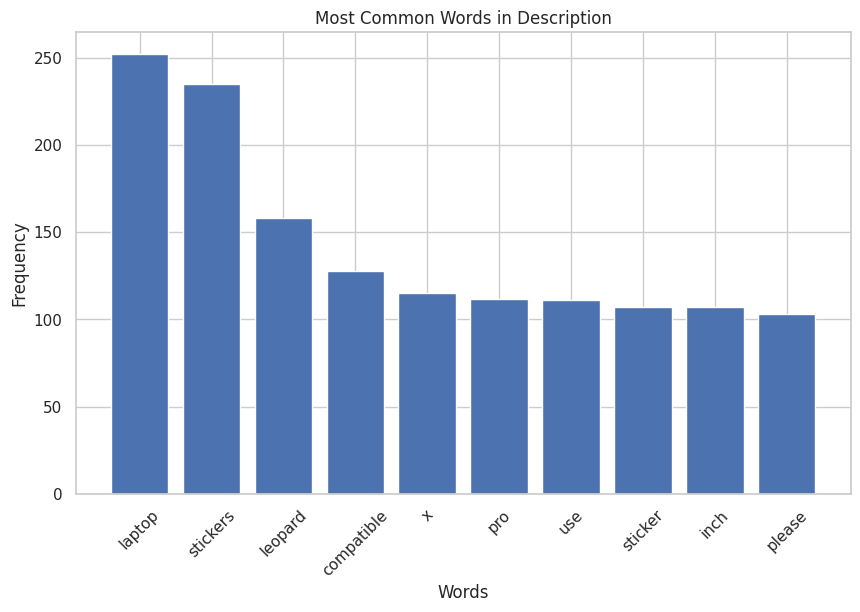

In [21]:
plot_most_common_words(most_common_description_words, 'Most Common Words in Description')

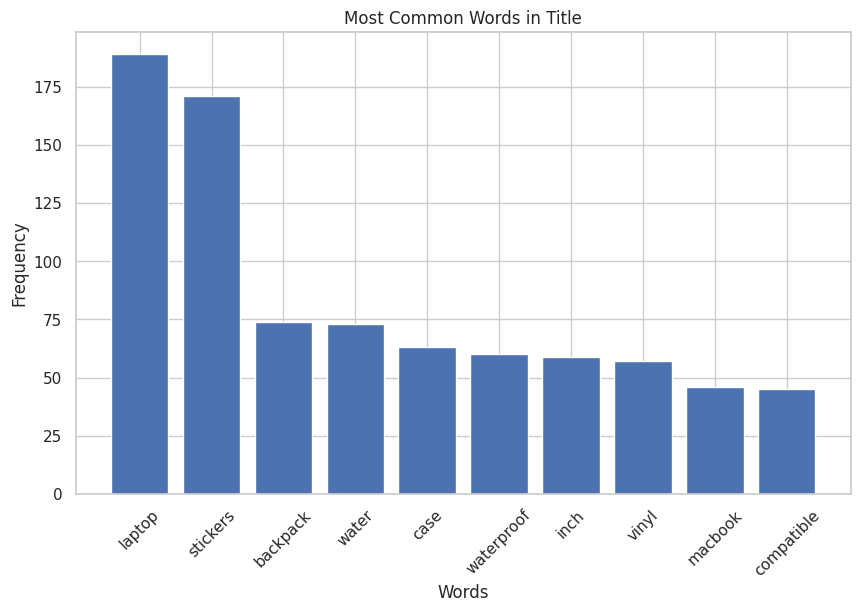

In [22]:
plot_most_common_words(most_common_title_words, 'Most Common Words in Title')